In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mt
import seaborn as sns

In [2]:
data=pd.read_csv("Scores.csv")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


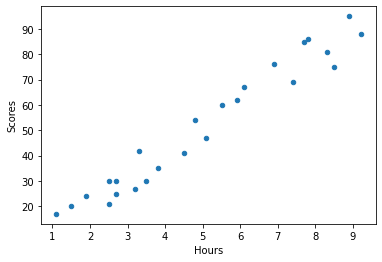

In [7]:
data.plot(kind="scatter",x="Hours",y="Scores")

Here, we observe that there is a fairly linear relationship between hour of study and score.

In [8]:
data.corr(method="pearson"),data.corr(method="spearman")

(           Hours    Scores
 Hours   1.000000  0.976191
 Scores  0.976191  1.000000,
            Hours    Scores
 Hours   1.000000  0.971891
 Scores  0.971891  1.000000)

It is observed that, there is a strong positive correlation between the two variables irrespective of the method.

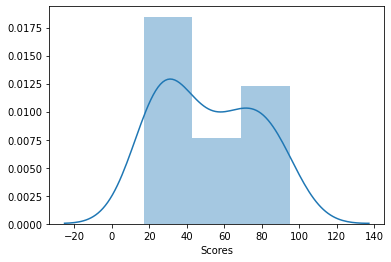

In [9]:
sns.distplot(data["Scores"])

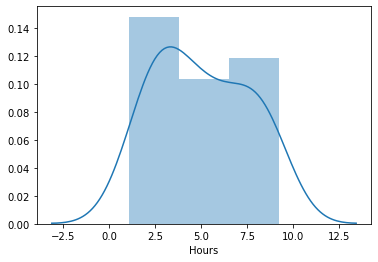

In [10]:
sns.distplot(data["Hours"])

It is observed that both the variables are following a normal distribution.

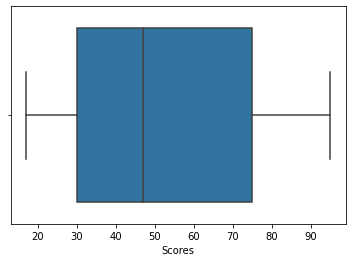

In [11]:
sns.boxplot(data["Scores"])

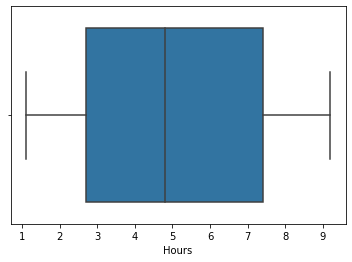

In [12]:
sns.boxplot(data["Hours"])

It is observed that there is no outliers for the 2 given variables.

## Linear Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms

In [14]:
X=data.iloc[:, :-1].values
Y=data.iloc[:, 1].values

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

### Grid search for hyper-parameter tuning

In [16]:
params = {"fit_intercept":[True,False],
    "normalize":[True,False],
    "copy_X":[True,False],
    "n_jobs":[2,3,4,5,6,7,8]}
params

{'fit_intercept': [True, False],
 'normalize': [True, False],
 'copy_X': [True, False],
 'n_jobs': [2, 3, 4, 5, 6, 7, 8]}

In [17]:
reg_grid=LinearRegression()
grid=ms.GridSearchCV(reg_grid,params)

In [18]:
grid.fit(X_train,Y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [2, 3, 4, 5, 6, 7, 8],
                         'normalize': [True, False]})

In [19]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept,param_n_jobs,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003192,0.004902,0.000199,0.000399,True,True,2,True,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
1,0.000000,0.000000,0.000199,0.000399,True,True,2,False,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
2,0.000798,0.000399,0.000000,0.000000,True,True,3,True,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
3,0.000399,0.000489,0.000200,0.000399,True,True,3,False,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
4,0.000200,0.000399,0.000399,0.000489,True,True,4,True,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
5,0.000399,0.000489,0.000399,0.000489,True,True,4,False,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
6,0.000598,0.000489,0.000199,0.000399,True,True,5,True,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
7,0.000199,0.000399,0.000399,0.000489,True,True,5,False,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
8,0.000199,0.000399,0.000199,0.000399,True,True,6,True,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29
9,0.000200,0.000399,0.000598,0.000489,True,True,6,False,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.911430,0.937046,0.974313,0.958175,0.846203,0.925433,0.044877,29


In [20]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 2, 'normalize': True}

In [21]:
grid.best_score_

0.9273340223344372

In [22]:
reg=LinearRegression(copy_X=True,fit_intercept=False,n_jobs=2,normalize=True)

In [23]:
reg.fit(X_train, Y_train)

LinearRegression(fit_intercept=False, n_jobs=2, normalize=True)

In [24]:
y_pred=reg.predict(X_test)

In [25]:
pred_df=pd.DataFrame({"Actual Value": Y_test,"Predicted Value":y_pred})
pred_df

,Actual Value,Predicted Value
0,60,56.880808
1,30,25.854913
2,27,33.094288
3,75,87.906703
4,47,52.744022


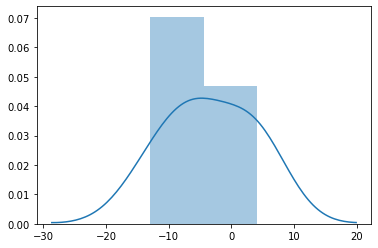

In [26]:
sns.distplot(np.array(Y_test-y_pred))


The interval covered by the residuals is between 2 and -10 which is good and it implies that the magnitude of residual values are not high.

In [27]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error : ", metrics.mean_absolute_error(Y_test,y_pred))
print("R-square Value : ",r2_score(Y_test,y_pred))

Mean Absolute Error :  6.401858402905523
R-square Value :  0.8391333833841212


### What will be the predicted score if a student studies for 9.25 hrs/day?

In [28]:
h=9.25
reg.predict([[h]])

array([95.66317627])

If a student studies for 9.25 hrs/day the student would score 95.66%